In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import array
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#import data
data = pd.read_csv("data.csv")

In [3]:
#viewing first 5 records
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
#summary of data
data.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,3,less_conv,inconv,problematic,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [5]:
#features (independent)
xn = data.iloc[:, 0:8]
xn.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority


In [6]:
#outcome class (dependent)
yn = data.iloc[:, -1]
yn.head()

0    recommend
1     priority
2    not_recom
3    recommend
4     priority
Name: class, dtype: object

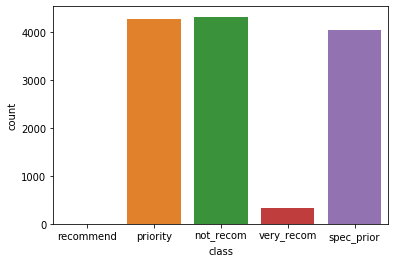

In [7]:
#visualizing the distribution outcome class count
plot_class = sns.countplot(yn)

In [8]:
#determining the frequency of these classes
yn.value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64

As it can be observed from the aove graph and values, the dataset is imbalanced. But as accuracy is chosen as the performance measure for the problem, the dataset must be balanced to obtain the correct results orelse if the same imbalanced dataset is used the outcome will be biased.
Thus, out of the multiple methods random over sampling is chosen because as the difference in count is much higher undersam-pling cannot be used as much of the useful data will be lost. Also, SMOTE isn't used as it is preferred for problems with binary outcome classes.
Moreover, the data is first split into training and testing samples and then oversampled because oversampling first might lead to creation of such train and test sample set with very little distinctive patterns covered in original data which would cause the model to overfit.

In [9]:
#spliting train-test data
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size = 0.3)

In [10]:
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
2996,usual,critical,completed,more,less_conv,convenient,problematic,not_recom
5118,pretentious,proper,foster,3,critical,convenient,problematic,recommended
11578,great_pret,critical,completed,3,less_conv,convenient,slightly_prob,priority
7054,pretentious,critical,complete,3,less_conv,inconv,problematic,priority
9849,great_pret,less_proper,completed,3,less_conv,convenient,slightly_prob,recommended


In [11]:
pqr = xn_train

In [12]:
pqr.insert(8,'class',yn_train,True)

In [13]:
pqr.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
2996,usual,critical,completed,more,less_conv,convenient,problematic,not_recom,not_recom
5118,pretentious,proper,foster,3,critical,convenient,problematic,recommended,priority
11578,great_pret,critical,completed,3,less_conv,convenient,slightly_prob,priority,spec_prior
7054,pretentious,critical,complete,3,less_conv,inconv,problematic,priority,spec_prior
9849,great_pret,less_proper,completed,3,less_conv,convenient,slightly_prob,recommended,priority


In [14]:
yn_train.value_counts()

not_recom     3030
priority      2969
spec_prior    2827
very_recom     244
recommend        2
Name: class, dtype: int64

In [15]:
datan_1 = pqr[pqr['class']=='very_recom']  
datan_1.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
1152,usual,less_proper,completed,2,less_conv,convenient,nonprob,recommended,very_recom
72,usual,proper,complete,2,less_conv,convenient,nonprob,recommended,very_recom
5403,pretentious,less_proper,completed,1,convenient,convenient,slightly_prob,recommended,very_recom
5466,pretentious,less_proper,completed,2,convenient,inconv,slightly_prob,recommended,very_recom
5412,pretentious,less_proper,completed,1,convenient,inconv,slightly_prob,recommended,very_recom


In [16]:
datan_2 = pqr[pqr['class']== 'recommend']
datan_2.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend


In [17]:
datan_n = pqr[pqr['class']== 'priority']
datan_n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
5118,pretentious,proper,foster,3,critical,convenient,problematic,recommended,priority
9849,great_pret,less_proper,completed,3,less_conv,convenient,slightly_prob,recommended,priority
7,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
112,usual,proper,complete,3,convenient,convenient,slightly_prob,priority,priority
5649,pretentious,less_proper,incomplete,1,less_conv,inconv,problematic,recommended,priority


In [18]:
datan_n = datan_n.append(datan_1) #appending very_reco
datan_n.tail()

,parents,has_nurs,form,children,housing,finance,social,health,class
1773,usual,improper,complete,1,critical,inconv,nonprob,recommended,very_recom
5628,pretentious,less_proper,incomplete,1,convenient,inconv,slightly_prob,recommended,very_recom
2433,usual,improper,foster,2,convenient,convenient,slightly_prob,recommended,very_recom
1242,usual,less_proper,completed,more,convenient,convenient,nonprob,recommended,very_recom
450,usual,proper,incomplete,1,less_conv,convenient,nonprob,recommended,very_recom


In [19]:
datan_n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3213,3213,3213,3213,3213,3213,3213,3213,3213
unique,3,5,4,4,3,2,3,2,2
top,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,priority
freq,1485,1037,870,957,1282,1738,1189,1937,2969


In [20]:
xn1 = datan_n.iloc[:, 0:8]
yn1 = datan_n.iloc[:, -1]

In [21]:
oversampler = RandomOverSampler()
xn1_resampled, yn1_resampled = oversampler.fit_resample(xn1, yn1)

In [22]:
data2n_final = pd.DataFrame(xn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7
0,pretentious,proper,foster,3,critical,convenient,problematic,recommended
1,great_pret,less_proper,completed,3,less_conv,convenient,slightly_prob,recommended
2,usual,proper,complete,1,convenient,convenient,problematic,priority
3,usual,proper,complete,3,convenient,convenient,slightly_prob,priority
4,pretentious,less_proper,incomplete,1,less_conv,inconv,problematic,recommended


In [23]:
data2n_final['class']=pd.DataFrame(yn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7,class
0,pretentious,proper,foster,3,critical,convenient,problematic,recommended,priority
1,great_pret,less_proper,completed,3,less_conv,convenient,slightly_prob,recommended,priority
2,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
3,usual,proper,complete,3,convenient,convenient,slightly_prob,priority,priority
4,pretentious,less_proper,incomplete,1,less_conv,inconv,problematic,recommended,priority


In [24]:
data2n_final.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data2n_final.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,proper,foster,3,critical,convenient,problematic,recommended,priority
1,great_pret,less_proper,completed,3,less_conv,convenient,slightly_prob,recommended,priority
2,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
3,usual,proper,complete,3,convenient,convenient,slightly_prob,priority,priority
4,pretentious,less_proper,incomplete,1,less_conv,inconv,problematic,recommended,priority


In [25]:
data2n = pqr[pqr['class']== 'not_recom']
data2n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
2996,usual,critical,completed,more,less_conv,convenient,problematic,not_recom,not_recom
8294,pretentious,very_crit,incomplete,2,less_conv,inconv,slightly_prob,not_recom,not_recom
1412,usual,less_proper,incomplete,3,convenient,convenient,problematic,not_recom,not_recom
10643,great_pret,improper,completed,2,convenient,convenient,slightly_prob,not_recom,not_recom
1484,usual,less_proper,incomplete,more,less_conv,convenient,problematic,not_recom,not_recom


In [26]:
data2n = data2n.append(datan_2)
data2n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3032,3032,3032,3032,3032,3032,3032,3032,3032
unique,3,5,4,4,3,2,3,2,2
top,usual,critical,incomplete,3,less_conv,convenient,problematic,not_recom,not_recom
freq,1012,623,782,771,1034,1532,1028,3030,3030


In [27]:
x1n = data2n.iloc[:, 0:8]
x1n.head()

,parents,has_nurs,form,children,housing,finance,social,health
2996,usual,critical,completed,more,less_conv,convenient,problematic,not_recom
8294,pretentious,very_crit,incomplete,2,less_conv,inconv,slightly_prob,not_recom
1412,usual,less_proper,incomplete,3,convenient,convenient,problematic,not_recom
10643,great_pret,improper,completed,2,convenient,convenient,slightly_prob,not_recom
1484,usual,less_proper,incomplete,more,less_conv,convenient,problematic,not_recom


In [28]:
y1n = data2n.iloc[:,-1]
y1n.head()

2996     not_recom
8294     not_recom
1412     not_recom
10643    not_recom
1484     not_recom
Name: class, dtype: object

In [29]:
x1_resampled, y1_resampled = oversampler.fit_resample(x1n, y1n)

In [30]:
data22n = pd.DataFrame(x1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7
0,usual,critical,completed,more,less_conv,convenient,problematic,not_recom
1,pretentious,very_crit,incomplete,2,less_conv,inconv,slightly_prob,not_recom
2,usual,less_proper,incomplete,3,convenient,convenient,problematic,not_recom
3,great_pret,improper,completed,2,convenient,convenient,slightly_prob,not_recom
4,usual,less_proper,incomplete,more,less_conv,convenient,problematic,not_recom


In [31]:
data22n['class']=pd.DataFrame(y1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7,class
0,usual,critical,completed,more,less_conv,convenient,problematic,not_recom,not_recom
1,pretentious,very_crit,incomplete,2,less_conv,inconv,slightly_prob,not_recom,not_recom
2,usual,less_proper,incomplete,3,convenient,convenient,problematic,not_recom,not_recom
3,great_pret,improper,completed,2,convenient,convenient,slightly_prob,not_recom,not_recom
4,usual,less_proper,incomplete,more,less_conv,convenient,problematic,not_recom,not_recom


In [32]:
data22n.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data22n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,critical,completed,more,less_conv,convenient,problematic,not_recom,not_recom
1,pretentious,very_crit,incomplete,2,less_conv,inconv,slightly_prob,not_recom,not_recom
2,usual,less_proper,incomplete,3,convenient,convenient,problematic,not_recom,not_recom
3,great_pret,improper,completed,2,convenient,convenient,slightly_prob,not_recom,not_recom
4,usual,less_proper,incomplete,more,less_conv,convenient,problematic,not_recom,not_recom


In [33]:
data2n_final = data2n_final.append(data22n)

In [34]:
data2n_final = data2n_final. append(pqr[pqr['class']== 'spec_prior'])

In [35]:
data2n_final.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,14825,14825,14825,14825,14825,14825,14825,14825,14825
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,not_recom
freq,7795,5891,6237,6458,7777,9412,5960,8810,3030


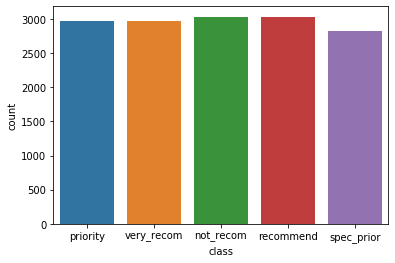

In [36]:
plot_class = sns.countplot(x="class", data= data2n_final)

In [37]:
xn_train = data2n_final.iloc[:,0:8]
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,pretentious,proper,foster,3,critical,convenient,problematic,recommended
1,great_pret,less_proper,completed,3,less_conv,convenient,slightly_prob,recommended
2,usual,proper,complete,1,convenient,convenient,problematic,priority
3,usual,proper,complete,3,convenient,convenient,slightly_prob,priority
4,pretentious,less_proper,incomplete,1,less_conv,inconv,problematic,recommended


In [38]:
# one-hot encoding
xn_train = pd.get_dummies(xn_train)

In [39]:
xn_train.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [40]:
yn_train = data2n_final.iloc[:,-1]
yn_train.head()

0    priority
1    priority
2    priority
3    priority
4    priority
Name: class, dtype: object

In [41]:
yn_train = pd.DataFrame(yn_train)
yn_train.head()

,class
0,priority
1,priority
2,priority
3,priority
4,priority


In [42]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_train['class'] = [rep_val[i] for i in yn_train['class']]

In [43]:
yn_train.head()

,class
0,1
1,1
2,1
3,1
4,1


In [44]:
xn_test = pd.get_dummies(xn_test)
xn_test.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
12278,1,0,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,0
8278,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
6804,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7237,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
10537,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [45]:
yn_test

12278     not_recom
8278     spec_prior
6804       priority
7237     spec_prior
10537    spec_prior
            ...    
11734    spec_prior
12598    spec_prior
10321      priority
2970       priority
10656      priority
Name: class, Length: 3888, dtype: object

In [46]:
yn_test = pd.DataFrame(yn_test)
yn_test

,class
12278,not_recom
8278,spec_prior
6804,priority
7237,spec_prior
10537,spec_prior
...,...
11734,spec_prior
12598,spec_prior
10321,priority
2970,priority


In [47]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_test['class'] = [rep_val[i] for i in yn_test['class']]

In [48]:
yn_test.head()

,class
12278,3
8278,2
6804,1
7237,2
10537,2


# Decision Tree

In decision tree, parameters like max_depth, min_samples_split, min_samples_leaf are specifically tuned to increase the accuracy of the model. Also, here entropy is chosen as the splitting citeria because there are model than two outcome classes and the numers assigned to these classes are actually to be considered as categorical values having equal importance.

### 1. max_depth -  how deep the tree can be

In [49]:
dt2n_training = np.tile(0., 27)
dt2n_testing = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    dt2 = tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy')
    dt2.fit(xn_train, yn_train)
    score1 = dt2.score(xn_train,yn_train)
    dt2n_training[i] = score1.mean()
    print(round(dt2n_training[i],5), end = "         |  ")
    #dt2.fit(xnf_test, ynf_test)
    score2 = dt2.score(xn_test,yn_test)
    dt2n_testing[i] = score2.mean()
    print(round(dt2n_testing[i],5))
    

depth | Training score    | Testing score
1   |   0.40877         |  0.33179
2   |   0.58725         |  0.62654
3   |   0.69046         |  0.53086
4   |   0.77295         |  0.64712
5   |   0.8402         |  0.73457
6   |   0.89659         |  0.82459
7   |   0.92479         |  0.87449
8   |   0.94064         |  0.90972
9   |   0.9569         |  0.91898
10   |   0.97538         |  0.94856
11   |   0.98435         |  0.96271
12   |   0.99312         |  0.97634
13   |   0.99669         |  0.98354
14   |   0.99838         |  0.98714
15   |   0.99973         |  0.98817
16   |   1.0         |  0.98894
17   |   1.0         |  0.98868
18   |   1.0         |  0.98945
19   |   1.0         |  0.98868
20   |   1.0         |  0.98868
21   |   1.0         |  0.98894
22   |   1.0         |  0.99074
23   |   1.0         |  0.99023
24   |   1.0         |  0.99048
25   |   1.0         |  0.99074
26   |   1.0         |  0.99074


In [50]:
dt2n_training=dt2n_training[dt2n_training!=0.]
dt2n_testing=dt2n_testing[dt2n_testing!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))

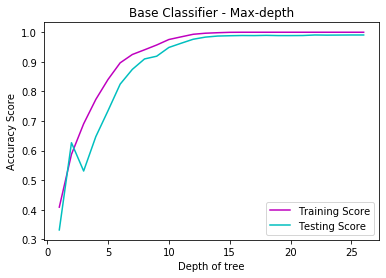

In [51]:
fig5, p5 = plt.subplots()
plt.plot(xaxis2, dt2n_training,'m-', Label='Training Score')
plt.plot(xaxis2, dt2n_testing,'c-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier - Max-depth')
legend = p5.legend(loc='lower right')

Oversampling hasn't caused the model to overfit in this case. 

### 2. min_samples_split -  minimum number of samples required to split an internal node

In [52]:
min_samples_splits_vals = np.linspace(0.01, 1.0, 100, endpoint=True)

In [53]:
dt3_training = np.tile(0., 100)
dt3_testing = np.tile(0., 100)
k=0
print("min_samples | Training score    | Testing score")
for i in min_samples_splits_vals:
    print(round(i,3),end="         |   ")
    dt3 = tree.DecisionTreeClassifier(min_samples_split=i,criterion = 'entropy')
    dt3.fit(xn_train, yn_train)
    score1 = dt3.score(xn_train,yn_train)
    dt3_training[k] = score1.mean()
    print(round(dt3_training[k],5), end = "         |  ")
    score2 = dt3.score(xn_test,yn_test)
    dt3_testing[k] = score2.mean()
    print(round(dt3_testing[k],5))
    k+=1
    

min_samples | Training score    | Testing score
0.01         |   0.95292         |  0.91924
0.02         |   0.92074         |  0.88529
0.03         |   0.90341         |  0.85725
0.04         |   0.87622         |  0.80607
0.05         |   0.87015         |  0.7963
0.06         |   0.86159         |  0.78729
0.07         |   0.85032         |  0.76852
0.08         |   0.85032         |  0.76852
0.09         |   0.82948         |  0.73688
0.1         |   0.82948         |  0.73688
0.11         |   0.81882         |  0.71888
0.12         |   0.81882         |  0.71888
0.13         |   0.81882         |  0.71888
0.14         |   0.81882         |  0.71888
0.15         |   0.81882         |  0.71888
0.16         |   0.79346         |  0.66049
0.17         |   0.78179         |  0.63863
0.18         |   0.78179         |  0.63863
0.19         |   0.76985         |  0.61934
0.2         |   0.76985         |  0.61934
0.21         |   0.76621         |  0.61857
0.22         |   0.75811       

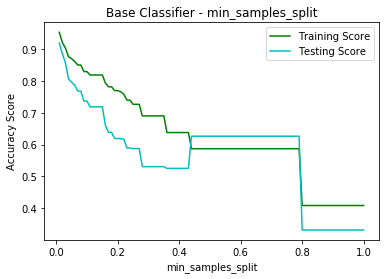

In [54]:
fig6, p6 = plt.subplots()
plt.plot(min_samples_splits_vals, dt3_training,'g-', Label='Training Score')
plt.plot(min_samples_splits_vals, dt3_testing,'c-', Label = 'Testing Score')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier - min_samples_split')
legend = p6.legend(loc='upper right')


Here, it can be observed that the model overfits in the range (0.2,0.4) and underfits in the range (0.8,1.0). Also, even if this parameter is tuned, the performance isn't as high as that was obtained when max_depth was tuned. In case of max_depth, the maximum acccuracy achieved was ~0.99 while in this case it is ~0.90. Thus, this parameter won't be tuned as it might hamper the performance of the model.

### 3. min_samples_leaf -  minimum number of samples required to be at a leaf node

In [55]:
min_samples_leafs_vals = np.linspace(0.1, 0.5, 5, True)

In [56]:
dt5_training = np.tile(0., 5)
dt5_testing = np.tile(0., 5)
k=0
print("min_samples | Training score    | Testing score")
for i in min_samples_leafs_vals:
    print(round(i,3),end="         |   ")
    dt5 = tree.DecisionTreeClassifier(min_samples_leaf=i,criterion = 'entropy')
    dt5.fit(xn_train, yn_train)
    score1 = dt5.score(xn_train,yn_train)
    dt5_training[k] = score1.mean()
    print(round(dt5_training[k],5), end = "         |  ")
    score2 = dt5.score(xn_test,yn_test)
    dt5_testing[k] = score2.mean()
    print(round(dt5_testing[k],5))
    k+=1
    

min_samples | Training score    | Testing score
0.1         |   0.7175         |  0.63529
0.2         |   0.58725         |  0.62654
0.3         |   0.40877         |  0.33179
0.4         |   0.40877         |  0.33179
0.5         |   0.20438         |  0.33179


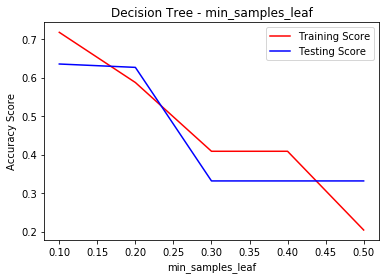

In [57]:
fig8, p8 = plt.subplots()
plt.plot(min_samples_leafs_vals, dt5_training,'r-',Label='Training Score')
plt.plot(min_samples_leafs_vals, dt5_testing,'b-',Label = 'Testing Score')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree - min_samples_leaf')
legend = p8.legend(loc='upper right')


Even when all the values of min_sample_leaf are considered, the performance doesnt matches to that presented by tuning max_depth. Thus, even this parameter can be ignored.

If we choose even the best values of parameters min_sample_leafs and min_sample_split we wont get accuracy as high as that obatined by tuning max_depth. Thus we won't consider these parameters while using this algorithm and for consideration in the next algorithms

#### Generating tree using depth = 10 (Just for visualization)

In [58]:
dt_final = tree.DecisionTreeClassifier(max_depth = 10,criterion = 'entropy')

In [59]:
dt_final.fit(xn_train, yn_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

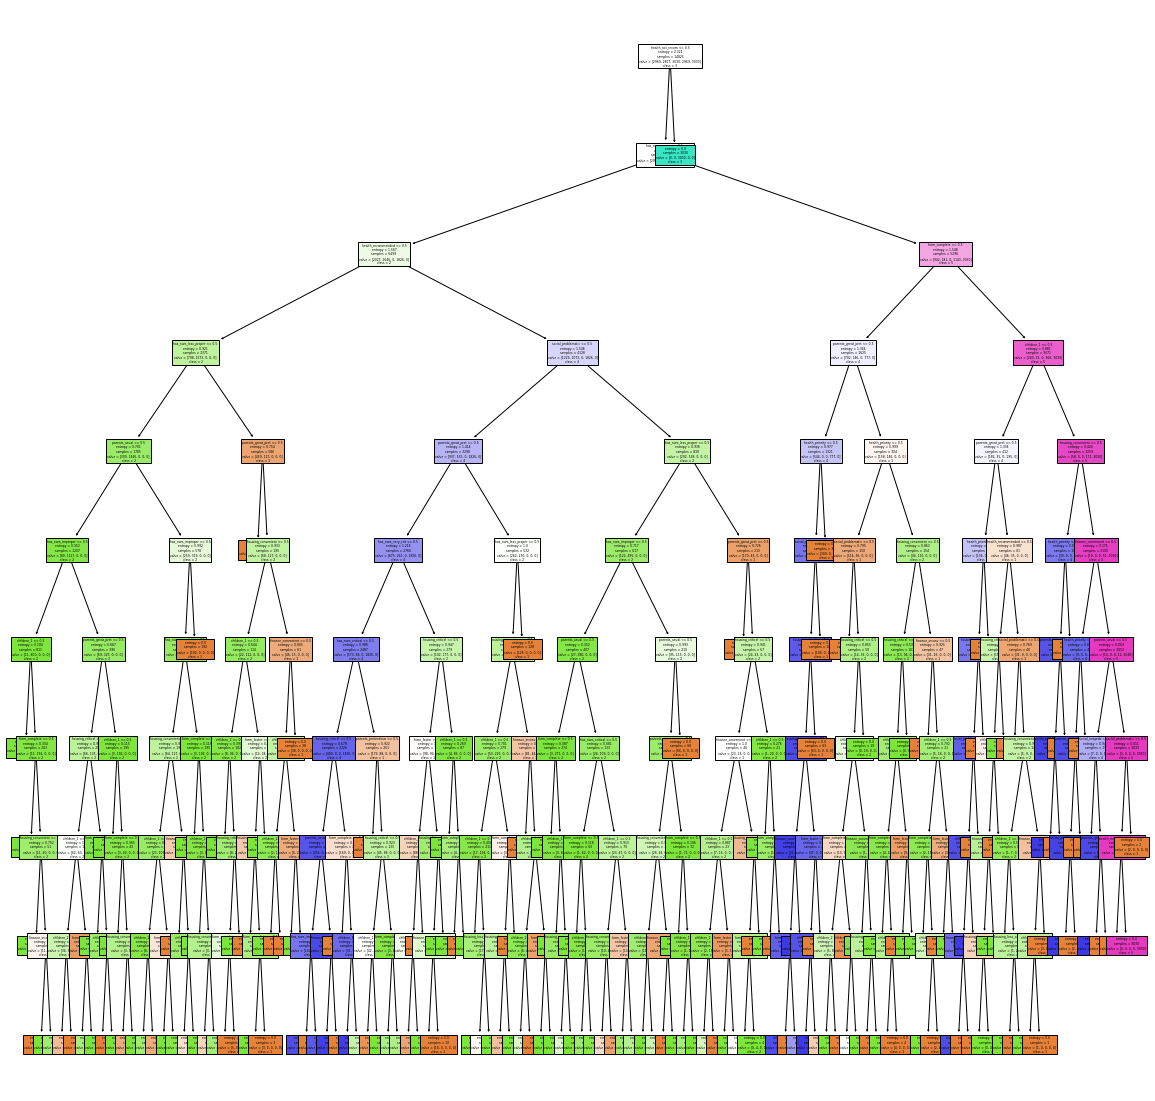

In [60]:
fig, axes = plt.subplots(figsize=(20,20))
tree.plot_tree(dt_final,
               feature_names = ['parents_great_pret', 'parents_pretentious', 'parents_usual', 'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit', 'form_complete', 'form_completed', 'form_foster', 'form_incomplete', 'children_1', 'children_2', 'children_3', 'children_more', 'housing_convenient', 'housing_critical', 'housing_less_conv', 'finance_convenient', 'finance_inconv', 'social_nonprob', 'social_problematic', 'social_slightly_prob', 'health_not_recom', 'health_priority', 'health_recommended'], 
               class_names=['1','2','3','4','5'],
               filled = True,fontsize = 3)
plt.show()

# Random Forest

Random forst is a bagging technique which is usually applied on a weak classifier to improve its performance. But, in this case, decision tree wasn't a weak classifier, thus, the results obtained using Random Forest won't be significantly different than that obtained using Decision Tree. 

In [61]:
train_rf = np.tile(0., 27)
test_rf = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range(1,27):
    print(i,end="   |   ")
    model_rf = RandomForestClassifier(max_depth=i, criterion = 'entropy',n_estimators=100)
    model_rf.fit(xn_train, yn_train.values.ravel())
    score1 = model_rf.score(xn_train,yn_train)
    train_rf[i] = score1.mean()
    print(round(train_rf[i],5), end = "         |  ")
    score2 = model_rf.score(xn_test,yn_test)
    test_rf[i] = score2.mean()
    print(round(test_rf[i],5))

depth | Training score    | Testing score
1   |   0.6315         |  0.55298
2   |   0.73288         |  0.65509
3   |   0.82206         |  0.74357
4   |   0.85841         |  0.78035
5   |   0.90712         |  0.84851
6   |   0.93855         |  0.8948
7   |   0.95231         |  0.91924
8   |   0.96796         |  0.9411
9   |   0.97902         |  0.95885
10   |   0.99035         |  0.97454
11   |   0.99669         |  0.98122
12   |   0.99906         |  0.98637
13   |   0.99987         |  0.99203
14   |   1.0         |  0.99408
15   |   1.0         |  0.99331
16   |   1.0         |  0.99357
17   |   1.0         |  0.99434
18   |   1.0         |  0.9946
19   |   1.0         |  0.99408
20   |   1.0         |  0.99434
21   |   1.0         |  0.99357
22   |   1.0         |  0.99408
23   |   1.0         |  0.99434
24   |   1.0         |  0.99331
25   |   1.0         |  0.99434
26   |   1.0         |  0.99408


In [62]:
train_rf=train_rf[train_rf!=0.]
test_rf=test_rf[test_rf!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))

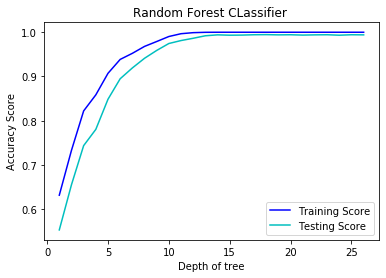

In [63]:
fig3, b3 = plt.subplots()
plt.plot(xaxis2, train_rf,'b-', Label='Training Score')
plt.plot(xaxis2, test_rf,'c-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Random Forest CLassifier ')
legend = b3.legend(loc='lower right')

# Comparision of Decision Tree and Random Forest

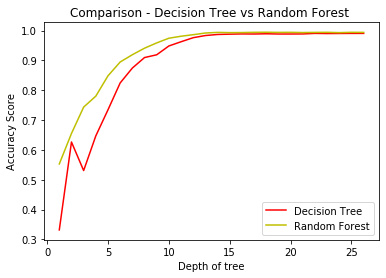

In [64]:
fig4, b4 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'r-', Label='Decision Tree')
plt.plot(xaxis2, test_rf,'y-', Label = 'Random Forest')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison - Decision Tree vs Random Forest ')
legend = b4.legend(loc='lower right')

As expected, except for the depth ~2, Random Forest's performance is similar to that of the Decision Tree.

# XGBoost

It is a boosting technique which is used to boost/improve the performance of a already strong classifier. In this case, as the decision tree was already a strong classifier. XGBoost's performance will be better than that of the other two stated algorithms.

In [65]:
train_xgb_md = np.tile(0., 30)
test_xgb_md = np.tile(0., 30)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    clf_xgb_md = xgb.XGBClassifier(n_estimators=100,max_depth=i)
    clf_xgb_md.fit(xn_train, yn_train.values.ravel())
    score1 = clf_xgb_md.score(xn_train, yn_train)
    train_xgb_md[i] = score1.mean()
    print(round(train_xgb_md[i],4), end = "         |  ")
    score2 = clf_xgb_md.score(xn_test,yn_test)
    test_xgb_md[i] = score2.mean()
    print(round(test_xgb_md[i],4))


depth | Training score    | Testing score
1   |   0.9271         |  0.8742
2   |   0.9792         |  0.9632
3   |   0.9964         |  0.9923
4   |   0.9997         |  0.9997
5   |   1.0         |  1.0
6   |   1.0         |  1.0
7   |   1.0         |  1.0
8   |   1.0         |  1.0
9   |   1.0         |  1.0
10   |   1.0         |  1.0
11   |   1.0         |  1.0
12   |   1.0         |  0.9997
13   |   1.0         |  1.0
14   |   1.0         |  1.0
15   |   1.0         |  1.0
16   |   1.0         |  1.0
17   |   1.0         |  1.0
18   |   1.0         |  1.0
19   |   1.0         |  1.0
20   |   1.0         |  1.0
21   |   1.0         |  1.0
22   |   1.0         |  1.0
23   |   1.0         |  1.0
24   |   1.0         |  1.0
25   |   1.0         |  1.0
26   |   1.0         |  1.0


In [66]:
train_xgb_md=train_xgb_md[train_xgb_md!=0.]
test_xgb_md=test_xgb_md[test_xgb_md!=0.]
xaxis = array.array('i',(i for i in range(1,27)))

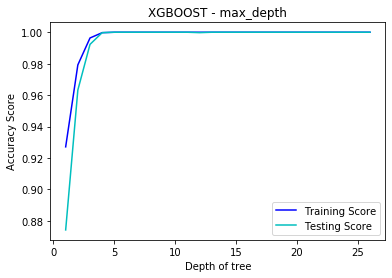

In [67]:
fig4, a4 = plt.subplots()
plt.plot(xaxis, train_xgb_md,'b-', Label='Training Score')
plt.plot(xaxis, test_xgb_md,'c-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('XGBOOST - max_depth')
legend = a4.legend(loc='lower right')

# Comparison of Decision Tree, Random Forest and XGBoost

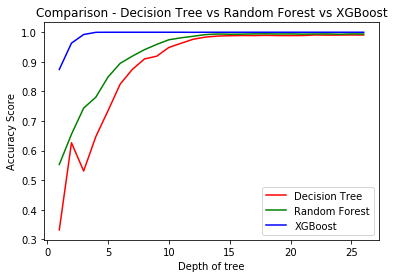

In [68]:
fig5, b5 = plt.subplots()
plt.plot(xaxis2,  dt2n_testing,'r-', Label='Decision Tree')
plt.plot(xaxis2, test_rf,'g-', Label = 'Random Forest')
plt.plot(xaxis2, test_xgb_md,'b-', Label = 'XGBoost')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Comparison - Decision Tree vs Random Forest vs XGBoost')
legend = b5.legend(loc='lower right')

Boosting is used when we already have strong base classifier. In this case, decision tree was already a strong classifiers. Although, all the classifiers have similar performances at higher levels of depth, XGBooost performed significantly better in comparison with the other models even at lower depth levels. Moreover, The performance of XGBoost is much higher, than the other two models even at lower depths, and is almost equal to the value of accuracy achieved by the other algorithms achived at higher depths.